Region Division
===

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
class InvalidOperationException(Exception):
    pass

def preprocess_map(map_data):
    if len(map_data.shape) == 2:
        return map_data
    elif len(map_data.shape) == 3:
        return np.mean(map_data[:, :, :3], axis = 2) / 255
    else:
        raise InvalidOperationException("Array must be of shape 2 or 3!")
        
def show_gray_image(image):    
    fig, ax = plt.subplots(figsize = (15, 15))
    imgplot = ax.imshow(image, cmap = 'gray', interpolation = 'nearest')

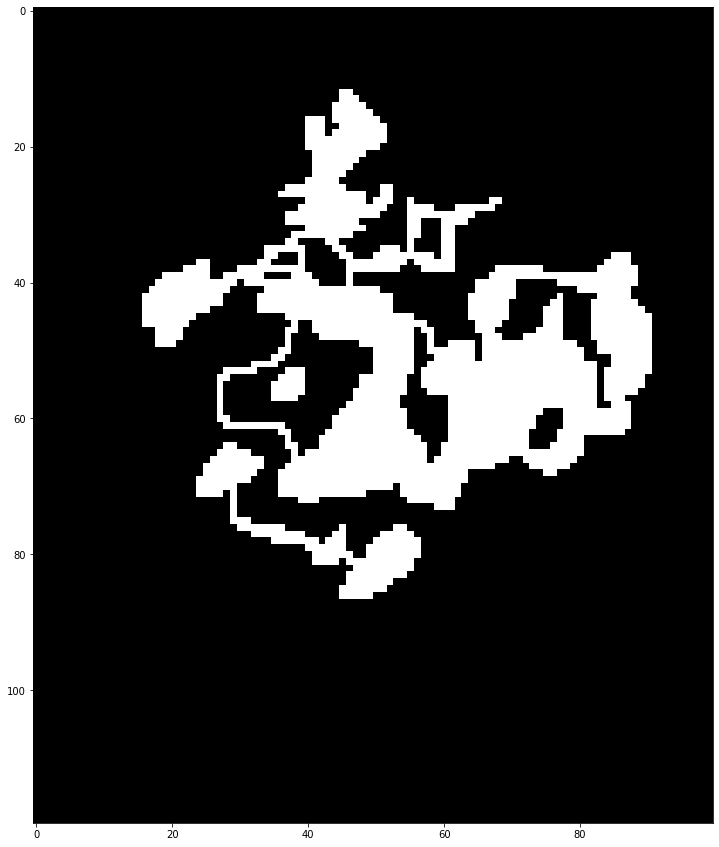

In [3]:
map_data = mpimg.imread('sample.bmp')
map_data = preprocess_map(map_data)
show_gray_image(map_data)

In [8]:
class Vertex:
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.adjacent = None
        self.is_edge = None
        
    def build_adj(self, vertices, radius):
        self.adjacent = []
        self.is_edge = False
        int_radius = int(np.ceil(radius))
        x_segment = range(max(self.x - int_radius, 0), min(self.x + int_radius + 1, vertices.shape[0]))
        y_segment = range(max(self.y - int_radius, 0), min(self.y + int_radius + 1, vertices.shape[1]))
        for x in x_segment:
            for y in y_segment:
                dist = self.calc_dist(Vertex(x, y))
                if dist > radius:
                    continue
                other = vertices[x, y]
                if other is None:
                    self.is_edge = True
                    continue
                self.adjacent.append(other)
                
    def calc_dist(self, other):
        return np.sqrt((other.x - self.x) ** 2 + (other.y - self.y) ** 2)
        
    def __repr__(self):
        return 'Vertex ({0}, {1})'.format(self.x, self.y)

In [9]:
def build_vertices(map_data, radius):
    vertices = np.array([[Vertex(x, y) if map_data[x, y] != 0 else None 
                          for y in range(map_data.shape[1])]
                         for x in range(map_data.shape[0])])
    for row in vertices:
        for vertex in row:
            if vertex is None:
                continue
            vertex.build_adj(vertices, 5)
    return vertices

def calc_edgemap(vertices):
    edgemap = np.array([[0 if vertices[x, y] is None else int(vertices[x, y].is_edge) 
                         for y in range(map_data.shape[1])]
                        for x in range(map_data.shape[0])])
    return edgemap
    
def show_submap_on_map(submap, map_data):
    max_map_value = np.max(map_data)
    max_edge_score = np.max(submap)
    image = np.tile(map_data.reshape(map_data.shape + (1, )), (1, 1, 3)) / max_map_value
    image[:, :, 1] *= (1 - submap / max_edge_score)
    image[:, :, 2] *= (1 - submap / max_edge_score)
    fig, ax = plt.subplots(figsize = (15, 15))
    imgplot = ax.imshow(image, interpolation = 'nearest')

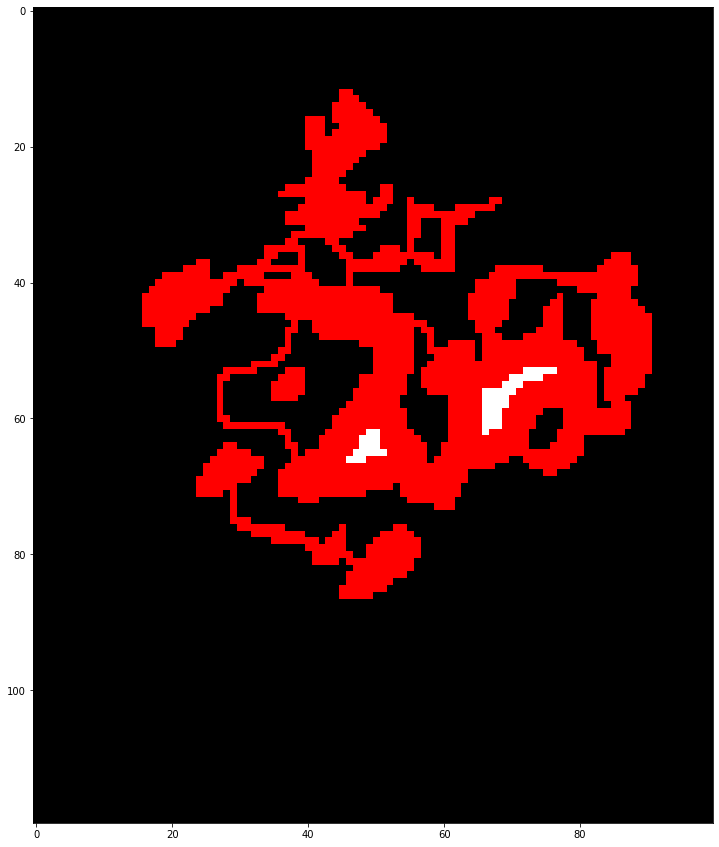

In [10]:
vertices = build_vertices(map_data, 5)
edgemap = calc_edgemap(vertices)
show_submap_on_map(edgemap, map_data)